# Module 2, Part 1

Please complete this assignment in a Jupyter Notebook.  

Please submit all parts of the Module 2 assignment as 1 notebook in the Canvas assignment for Module 2 ("Module 2 Assignment").

# Section 0: Basic Setup & Initialization 



Importing required libraries


In [ ]:
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split, KFold
from random import randrange, seed
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [ ]:
# mounting the google drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# reading the dataset
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Module 2/datasetHW2.csv")

dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Section 1: Pre-Processing

### 1\. Remove all rows containing null values and reset the indices of the data frame (so that the index values are consecutive numbers)


In [ ]:
dataset = dataset.dropna()
print(dataset.isna().sum())
dataset = dataset.reset_index(drop=True)


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


Convert the categorical column values into one hot encoded vectors.

We will use OneHotEncoder (already imported in the Basic Setup & Initialization section).  This results in 4 new attributes (per object/row), each of which will correspond to one of the categorical variable values (ocean_proximity_INLAND	ocean_proximity_ISLAND	ocean_proximity_NEAR BAY,	ocean_proximity_NEAR OCEAN).

Execute the code below.

In [ ]:
# converting categorical columns into one hot encoded vectors
enc = OneHotEncoder(drop = 'first')
one_hot_encoded = pd.DataFrame(enc.fit_transform(dataset[["ocean_proximity"]].iloc[:,:]).toarray())
feature_names = enc.get_feature_names(dataset[["ocean_proximity"]].columns.tolist()).tolist()
one_hot_encoded.columns = feature_names
one_hot_encoded

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
20428,1.0,0.0,0.0,0.0
20429,1.0,0.0,0.0,0.0
20430,1.0,0.0,0.0,0.0
20431,1.0,0.0,0.0,0.0


Add the 4 new colums to the dataset (concatenate the new columns to the original dataset).

In [ ]:
# joining the one hot encoded dataset back to the original dataset
dataset_one_hot_encoded = pd.concat([dataset.drop(["ocean_proximity"], axis = 1), one_hot_encoded], axis = 1)
dataset_one_hot_encoded

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1.0,0.0,0.0,0.0
20429,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1.0,0.0,0.0,0.0
20430,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1.0,0.0,0.0,0.0
20431,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1.0,0.0,0.0,0.0


### 2\. Split dataset into train and test data (use median house value as target/dependent variable and remaining as independent/input variables (attributes))

In [ ]:
from sklearn.model_selection import train_test_split

y = dataset_one_hot_encoded['median_house_value']
X = dataset_one_hot_encoded.drop('median_house_value',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### 3\. Apply min-max scaling to the data in order to normalize it.

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Section 2: Regularization

### 1\. Apply linear regression without regularization 


In [ ]:
regr = LinearRegression()
regr.fit(X_train_scaled, y_train)
regr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([-9.47995817e+07, -1.92549410e+09, -2.34563466e+08, ...,
       -3.65023204e+09, -6.48667285e+09, -2.96976470e+09])

### 2\.  Is the model showing signs of overfitting?  Please explain.

### 3\. Create a plot of the features along the x-axis and the model coefficients along the y-axis.




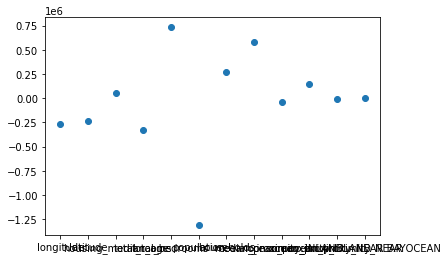

In [ ]:
plt.scatter(x=X.columns, y=regr.coef_)

### 4\. Create a scatter plot with predicted values  and actual values for training 

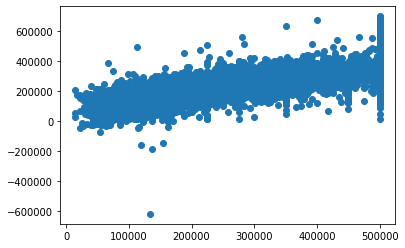

In [ ]:
plt.scatter(x=y_train, y=regr.predict(X_train_scaled))

### 5\. Create a scatter plot with predicted values and actual values for the test set 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


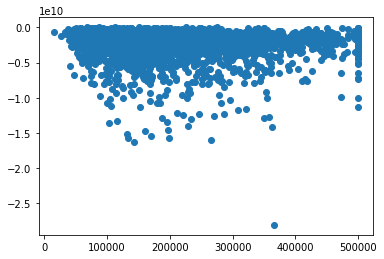

In [ ]:
plt.scatter(x=y_test, y=regr.predict(X_test))

### 6\.  Please add any observations that you have when comparing the two graphs you plotted in the previous two questions.

### 7\. Calculate r2 and the mean squared error for both the training and test sets

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
r2 = str(r2_score(y_test, regr.predict(X_test)))
mse = str(mean_squared_error(y_test, regr.predict(X_test)))
print("r2 = " + r2 + "\nmse = " + mse)

r2 = -641545822.8839234
mse = 8.25944902488224e+18


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


### 8\. Use ridge regression with alpha = 1 on the dataset.

The Ridge function (sklearn.linear_model.Ridge) which we already imported in Section 0, is an implementation of Linear Regression with L2 regularization.

In [ ]:
clf1 = Ridge(alpha=1)
clf1.fit(X_train_scaled, y_train)

Ridge(alpha=1)

### 9\. Calculate r2 and the mean squared error for the training and test sets

In [ ]:
r2 = str(r2_score(y_test, clf1.predict(X_test)))
mse = str(mean_squared_error(y_test, clf1.predict(X_test)))
print("r2 = " + r2 + "\nmse = " + mse)

r2 = -340930612.14625114
mse = 4.3892406675735695e+18


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Ridge was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Ridge was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


### 10\. Use ridge regression with alpha = 0.1 on the dataset




In [ ]:
clf2 = Ridge(alpha=0.1)
clf2.fit(X_train_scaled, y_train)

Ridge(alpha=0.1)

### 11\.  Calculate r2 and the mean squared error for the training and test sets

In [ ]:
r2 = str(r2_score(y_test, clf2.predict(X_test)))
mse = str(mean_squared_error(y_test, clf2.predict(X_test)))
print("r2 = " + r2 + "\nmse = " + mse)

r2 = -597828240.7645224
mse = 7.69661605557025e+18


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Ridge was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Ridge was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


### 12\. Use ridge regression with alpha = 10 on the dataset

In [ ]:
clf3 = Ridge(alpha=10)
clf3.fit(X_train_scaled, y_train)

Ridge(alpha=10)

### 13\.  Calculate r2 and the mean squared error for the training and test sets

In [ ]:
r2 = str(r2_score(y_test, clf3.predict(X_test)))
mse = str(mean_squared_error(y_test, clf3.predict(X_test)))
print("r2 = " + r2 + "\nmse = " + mse)

r2 = -15082144.773978427
mse = 1.941719664728996e+17


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Ridge was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Ridge was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


### 14\. Enter your observations about the impact on model performance of the different regularization parameter settings that you experimented with in Questions 8-13.

### 15\. Create a plot of the features along the x-axis and the model coefficients along the y-axis that includes in 1 graph both the unregularized regression model and the models with regularization parameters 0.1, 1, and 10 that you explored above.

### 16\.  Please enter your observations about the plot in the previous question below.